In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dCV = pd.read_csv('full_data.csv').fillna(0)
dCV.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2020-02-25,Afghanistan,0.0,0.0,1,0.0
1,2020-02-26,Afghanistan,0.0,0.0,1,0.0
2,2020-02-27,Afghanistan,0.0,0.0,1,0.0
3,2020-02-28,Afghanistan,0.0,0.0,1,0.0
4,2020-02-29,Afghanistan,0.0,0.0,1,0.0


In [7]:
def groupby_column(df, column):
    gb_obj = df.groupby(column)
    gb_datadict = {key: gb_obj.get_group(key) for key in gb_obj.groups}
    gb_datadict.keys()
    return gb_datadict

In [10]:
dCV_loc_dict = groupby_column(dCV, 'location')
dCV_loc_dict['Italy']

,date,location,new_cases,new_deaths,total_cases,total_deaths
915,2020-01-31,Italy,0.0,0.0,2,0.0
916,2020-02-01,Italy,0.0,0.0,2,0.0
917,2020-02-02,Italy,0.0,0.0,2,0.0
918,2020-02-03,Italy,0.0,0.0,2,0.0
919,2020-02-04,Italy,0.0,0.0,2,0.0
920,2020-02-05,Italy,0.0,0.0,2,0.0
921,2020-02-06,Italy,0.0,0.0,2,0.0
922,2020-02-07,Italy,1.0,0.0,3,0.0
923,2020-02-08,Italy,0.0,0.0,3,0.0
924,2020-02-09,Italy,0.0,0.0,3,0.0


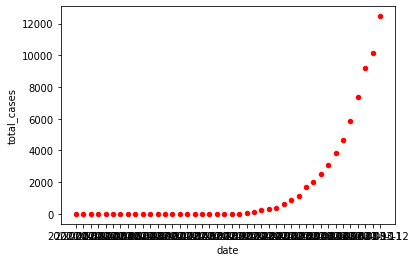

In [12]:
dCV_loc_dict['Italy'].plot(kind='scatter',x='date',y='total_cases',color='red')
plt.show()

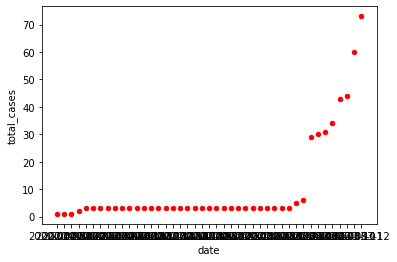

In [17]:
dCV_loc_dict['India'].plot(kind='scatter',x='date',y='total_cases',color='red')
plt.show()